In [6]:
import GPflow
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [20]:
x1 = list()
y1 = list()
data = []
with open("result_5_months.csv", "r") as ins:
    for line in ins:
        tokens = line.split(',')
        data.append(line)
        x1.append(int(tokens[2]))
        y1.append(int(tokens[3]))

x2 = np.asarray(x1).astype('f')
y2 = np.asarray(y1).astype('f')

In [21]:
y2_scaled = y2 / y2.max()

In [22]:
#k = GPflow.kernels.Matern52(1, lengthscales=14*24.0) + GPflow.kernels.PeriodicKernel(1, period=24.0) * GPflow.kernels.PeriodicKernel(1, period=7*24.0)
km = GPflow.kernels.Matern52(1, lengthscales=14*24.0)
k724 = GPflow.kernels.PeriodicKernel(1, period=7*24.0)
k24 = GPflow.kernels.PeriodicKernel(1, period=24.0)
k24.period.fixed = True
k724.period.fixed = True
k = km * k24 * k724
m = GPflow.gpr.GPR(x2[:,None], y2_scaled[:,None], kern=k)
m.likelihood.variance = 0.002
print(m.compute_log_likelihood())
m.optimize()
print(m.compute_log_likelihood())

5105.63509
6073.63947656


In [23]:
m.compute_log_likelihood()

6073.6394765571495

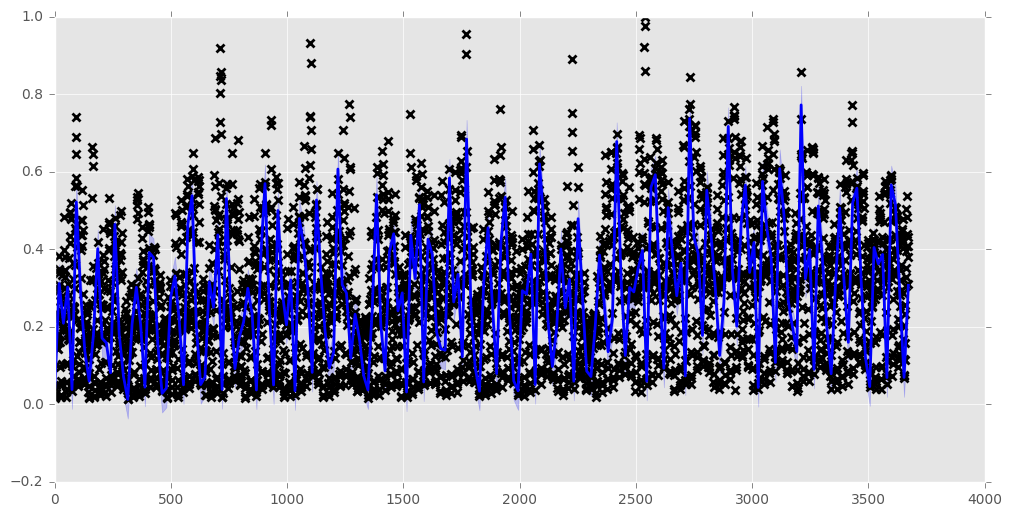

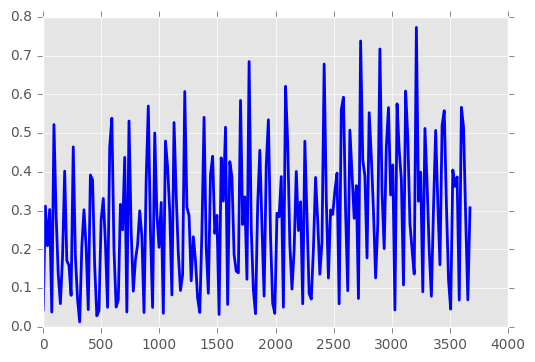

In [26]:
def plot(m):
    xx = np.linspace(x2.min(), x2.max(), 200)[:,None]
    mean, var = m.predict_y(xx)
    plt.figure(figsize=(12, 6))
    plt.plot(x2, y2_scaled, 'kx', mew=2)
    plt.plot(xx, mean, 'b', lw=2)
    plt.fill_between(xx[:,0], mean[:,0] - 2*np.sqrt(var[:,0]), mean[:,0] + 2*np.sqrt(var[:,0]), color='blue', alpha=0.2)
    plt.show()
    plt.plot(xx, mean, 'b', lw=2)
plot(m)

3672


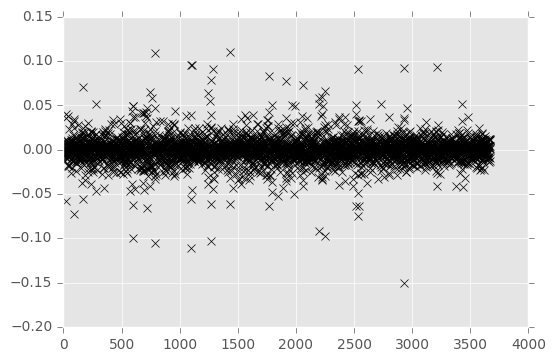

In [35]:
mean, var = m.predict_y(x2[:,None])
print(len(mean[:,0]))
plt.plot(x2, y2_scaled - mean[:,0], 'kx', mew=0.5)

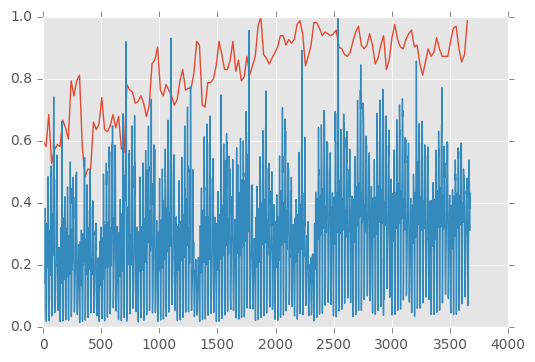

In [34]:
weather_data = []
x1_temp = []
y1_temp = []
with open("weather_result_5_mon.csv", "r") as ins:
    for line in ins:
        tokens = line.split(',')
        weather_data.append(line)
        x1_temp.append(int(tokens[2]))
        y1_temp.append(float(tokens[3]))
y1_temp = np.array(y1_temp)
plt.plot(x1_temp, y1_temp/y1_temp.max(), mew=2)
plt.plot(x2, y2_scaled, mew=0.5)

In [ ]:
plt.plot(x2, y2_scaled - mean[:,0], 'kx', mew=2)
plt.plot(x1_temp, y2_scaled - mean[:,0], 'kx', mew=2)

(0, 300)

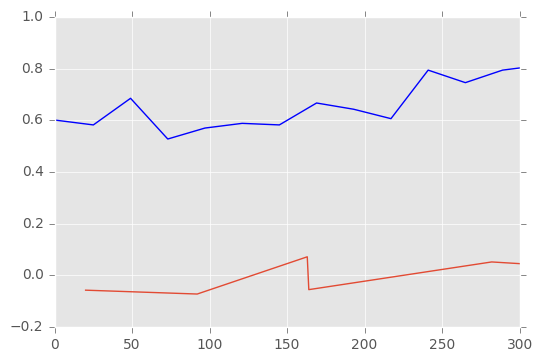

In [64]:
y2_scaled_wo_mean = y2_scaled - mean[:,0]
residuals_x = []
residuals_y = []
for i in range(len(y2_scaled_wo_mean)):
    if(abs(y2_scaled_wo_mean[i])>0.05):
        residuals_x.append(i)
        residuals_y.append(y2_scaled_wo_mean[i])

plt.plot(x1_temp, y1_temp/y1_temp.max(), mew=2,c='b')
plt.plot(residuals_x, residuals_y,mew=2)
plt.xlim(0,300)


In [ ]:
#plot the function posterior
plt.figure(figsize=(12, 6))
for i, s in sample_df.iterrows():
    m.set_parameter_dict(s)
    f = m.predict_f_samples(xx, 1)
    plt.plot(xx, f[0,:,:], 'b', lw=2, alpha = 0.05)
    
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(0, 6)

In [9]:
k_daily = GPflow.kernels.PeriodicKernel(1, period=24.0)
k_weekly = GPflow.kernels.PeriodicKernel(1, period=24.0*7.0)
k_growth = GPflow.kernels.Linear(1)
k_total = k_daily+k_weekly+k_growth

In [10]:
k_total

Name,values,prior,constraint
unnamed.periodickernel_2.period,[ 168.],None,+ve
unnamed.periodickernel_2.lengthscales,[ 1.],None,+ve
unnamed.periodickernel_2.variance,[ 1.],None,+ve
unnamed.periodickernel_1.variance,[ 1.],None,+ve
unnamed.periodickernel_1.period,[ 24.],None,+ve
unnamed.periodickernel_1.lengthscales,[ 1.],None,+ve
unnamed.linear.variance,[ 1.],None,+ve


In [65]:
x1_test = list()
y1_test = list()
with open("sample_result_july.csv", "r") as ins:
    for line in ins:
        tokens = line.split(',')
        x1_test.append(int(tokens[2]))
        y1_test.append(int(tokens[3]))

x2_test = np.asarray(x1_test).astype('f')
y2_test = np.asarray(y1_test).astype('f')

In [43]:
print(x2_test)



[   1.   16.   17.   24.   52.   54.   57.   58.   62.   65.   72.   74.
   83.   84.   86.   94.   97.  100.  121.  125.  127.  143.  149.  152.
  153.  163.  191.  222.  224.  237.  238.  241.  242.  250.  259.  272.
  275.  285.  289.  290.  292.  297.  302.  305.  311.  327.  330.  332.
  337.  340.  343.  349.  364.  366.  374.  375.  390.  408.  415.  429.
  434.  448.  452.  461.  463.  474.  482.  487.  489.  506.  529.  539.
  560.  565.  569.  574.  581.  584.  593.  594.  606.  616.  618.  620.
  625.  626.  633.  635.  649.  653.  656.  666.  669.  670.  672.  680.
  686.  691.  696.  700.  703.  705.  707.  713.  715.  729.  738.]


"\nplt.plot(X, Y, 'kx', mew=2)\n_ = plt.xlim(xx.min(), xx.max())\n_ = plt.ylim(0, 6)\n"

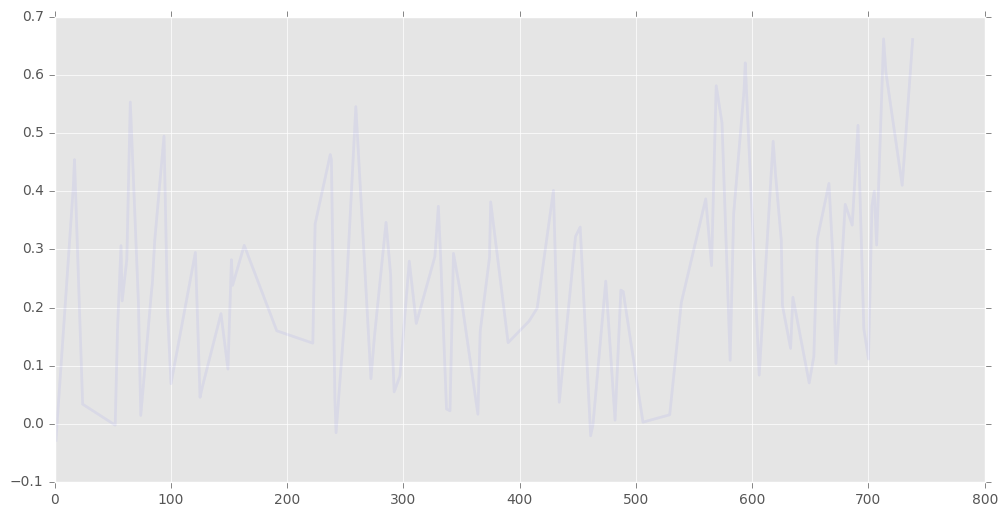

In [66]:
#plot the function posterior
plt.figure(figsize=(12, 6))
f = m.predict_f_samples(x2_test[:,None], 1)
plt.plot(x2_test[:,None], f[0,:,:], 'b', lw=2, alpha = 0.05)

'''
plt.plot(X, Y, 'kx', mew=2)
_ = plt.xlim(xx.min(), xx.max())
_ = plt.ylim(0, 6)
'''

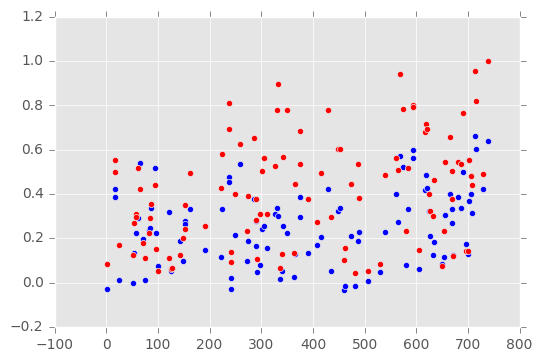

In [46]:
plt.scatter(x2_test[:,None], f[0,:,:])
plt.scatter(x2_test[:,None],y2_test_scaled,c='red')


In [67]:
predictions = list()
for a in f[0]:
    predictions.append(a[0]*y2.max())
    


In [68]:
predictions = np.asarray(predictions).astype('i')

In [71]:
predictions

array([ -90, 1287, 1434,  106,   -7,  512,  966,  667,  891, 1746,  655,
         45,  702,  764,  993, 1562,  617,  217,  930,  143,  200,  597,
        296,  890,  751,  968,  504,  437, 1085, 1461, 1432,  134,  -48,
        621, 1722,  244,  472, 1093,  806,  475,  173,  260,  652,  882,
        544,  907, 1180,  899,   80,   70,  924,  712,   51,  502,  902,
       1204,  440,  557,  627, 1267,  116, 1017, 1068,  -65,   -5,  774,
         19,  725,  717,    8,   48,  658, 1221,  858, 1835, 1633,  344,
       1137, 1814, 1959,  264, 1326, 1533, 1357,  994,  641,  409,  686,
        221,  366, 1003, 1305,  948,  790,  327, 1191, 1078, 1620,  514,
        351, 1184, 1262,  970, 2089, 1908, 1294, 2086], dtype=int32)

In [72]:
y2_test

array([  216.,  1396.,  1260.,   430.,   321.,   680.,   787.,   746.,
        1309.,  1073.,   454.,   286.,   572.,   735.,   903.,  1121.,
         384.,   131.,   278.,   150.,   170.,   313.,   507.,   883.,
         612.,  1253.,   652.,  1078.,  1473.,  2055.,  1757.,   350.,
         231.,  1017.,  1583.,   587.,   994.,  1648.,   959.,   719.,
         265.,   781.,  1272.,  1428.,   785.,  1334.,  1977.,  2273.,
         169.,   330.,  1430.,  1972.,   342.,  1125.,  1351.,  1732.,
         952.,   687.,  1248.,  1974.,   749.,  1522.,  1525.,   258.,
         390.,  1130.,   110.,  1361.,   963.,   131.,   211.,  1230.,
        1429.,  1283.,  2385.,  1986.,   595.,  1305.,  2031.,  2008.,
         368.,  1725.,  1814.,  1755.,  1016.,   816.,   761.,  1170.,
         195.,   591.,  1374.,  1664.,  1271.,   955.,   308.,  1382.,
        1361.,  1940.,   362.,   356.,  1400.,  1224.,  1112.,  2414.,
        2080.,  1238.,  2531.], dtype=float32)

In [64]:
(y2_test_scaled - predictions)*y2.max().astype('i')

array([  3.60285034e+02,   5.15949341e+02,   2.35468582e+02,
         4.93114807e+02,   4.02690460e+02,   4.24404449e+02,
         1.32937050e+01,   2.19402145e+02,   7.10751709e+02,
        -3.64791443e+02,  -5.27680283e+01,   3.22862549e+02,
        -2.99562187e+01,   1.36534271e+02,   6.00944366e+01,
        -2.35540619e+02,  -2.30556595e+02,  -7.80090256e+01,
        -6.54488647e+02,   2.80273266e+01,   1.66110182e+00,
        -2.05585602e+02,   3.28805389e+02,   2.18570084e+02,
        -7.26067734e+01,   5.20348328e+02,   3.53882996e+02,
         9.78480469e+02,   7.84396606e+02,   1.05208057e+03,
         7.61099548e+02,   3.67133606e+02,   3.74165009e+02,
         5.88773010e+02,   2.80605560e+02,   4.19471069e+02,
         6.50492615e+02,   8.68217957e+02,   3.17923645e+02,
         3.78922150e+02,   1.73968491e+02,   7.17853027e+02,
         8.28649719e+02,   9.77607178e+02,   4.88909637e+02,
         6.91768066e+02,   1.40418384e+03,   1.89045239e+03,
         1.53454544e+02,